# Matplotlib examples

#### Instructor: Eric Lindsey
---------

In [ ]:
#import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this "jupyter magic" line (starting with the special symbol %) tells jupyter that your screen is high-resolution,
# so that the figures don't appear all blurry.
%config InlineBackend.figure_format = 'retina' # better looking figures on high-resolution screens


## 1. Basic plotting

Matplotlib is a matlab-style plotting library in python. It has become very popular and is easy to use for quick plots. There is too much to cover to do this justice, but a few examples are provided; also check the documentation for extensive examples, tutorials, and details on the many options: https://matplotlib.org/stable/index.html

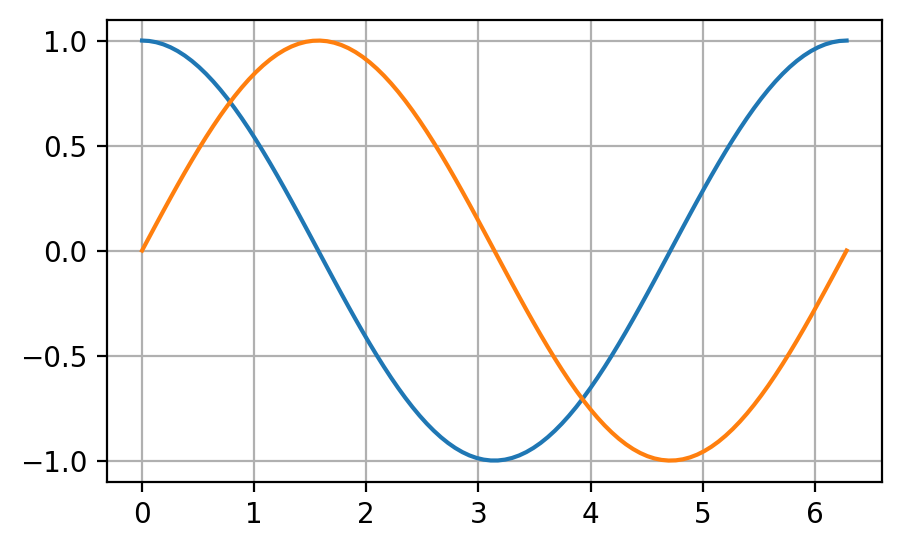

In [ ]:
# create some data - sine and cosine
t=np.linspace(0,2*np.pi,100)
y1=np.cos(t)
y2=np.sin(t)

plt.figure(figsize=(5,3)) # figure size is given by (width,height)
# ax1=plt.subplot(1,1,1)
# plot the data
plt.plot(t,y1)
plt.plot(t,y2)

# add a grid
plt.grid()

# last command to finish the plot - after this, nothing can be added to it.
plt.show()

In [ ]:
import numpy as np

arr = np.random.randint(0,10,5)
print(arr)
print(len(arr))
print(arr[0:5])


[6 7 9 9 7]
5
[6 7 9 9 7]


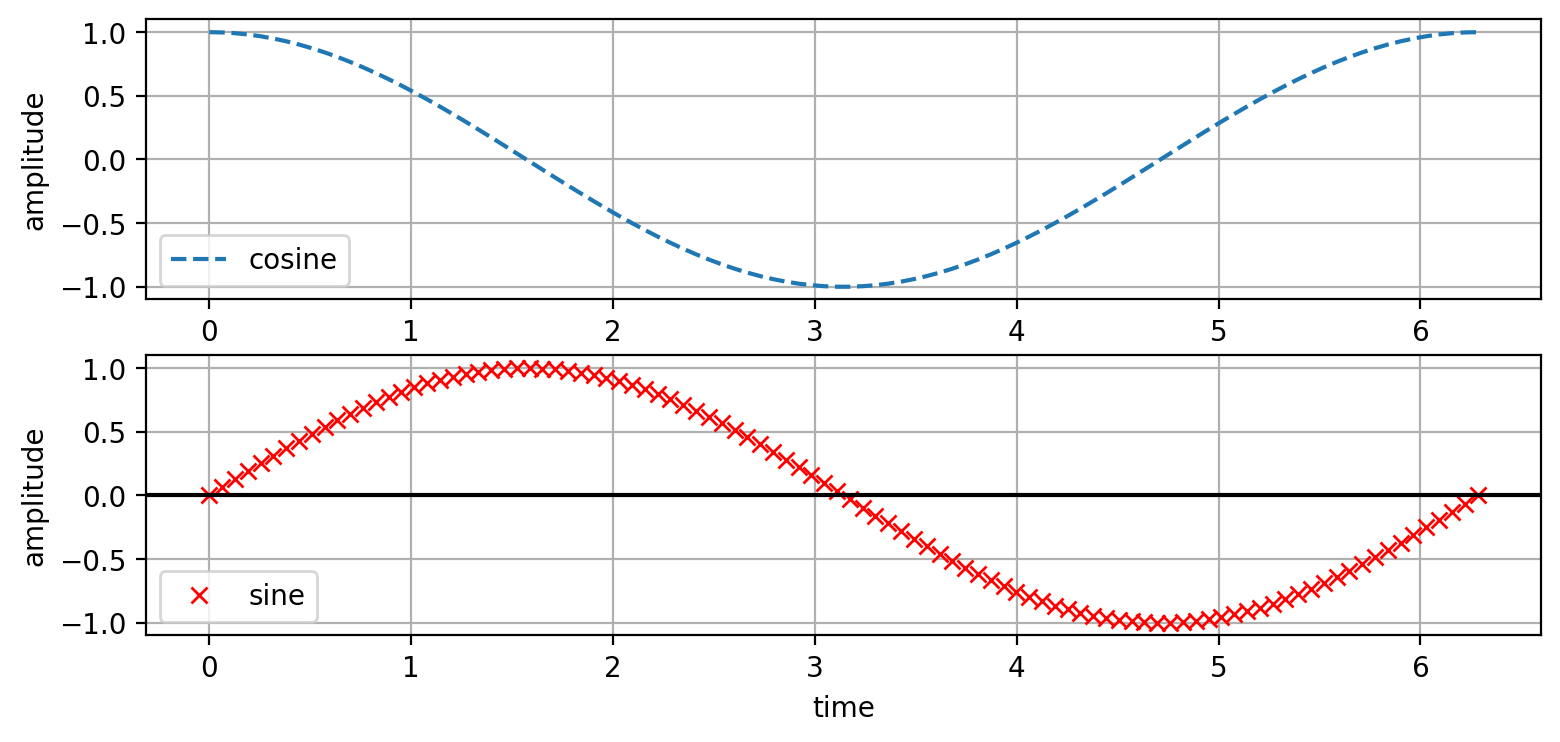

In [4]:
# another demo, setting plot style, legend, and subplots
plt.figure(figsize=(9,4))

ax1 = plt.subplot(2,1,1)
ax1.plot(t,y1,'--',label='cosine')
ax1.grid()
ax1.legend(loc='lower left')
ax1.set_ylabel('amplitude')
ax1.set_xlabel('time')

ax2 = plt.subplot(2,1,2)
ax2.plot(t,y2,'rx',label='sine')
ax2.grid()
ax2.legend(loc='lower left')
ax2.set_ylabel('amplitude')
ax2.set_xlabel('time')

# add a line at zero on the plot
ax2.axhline(y=0, color ='black')

plt.show()

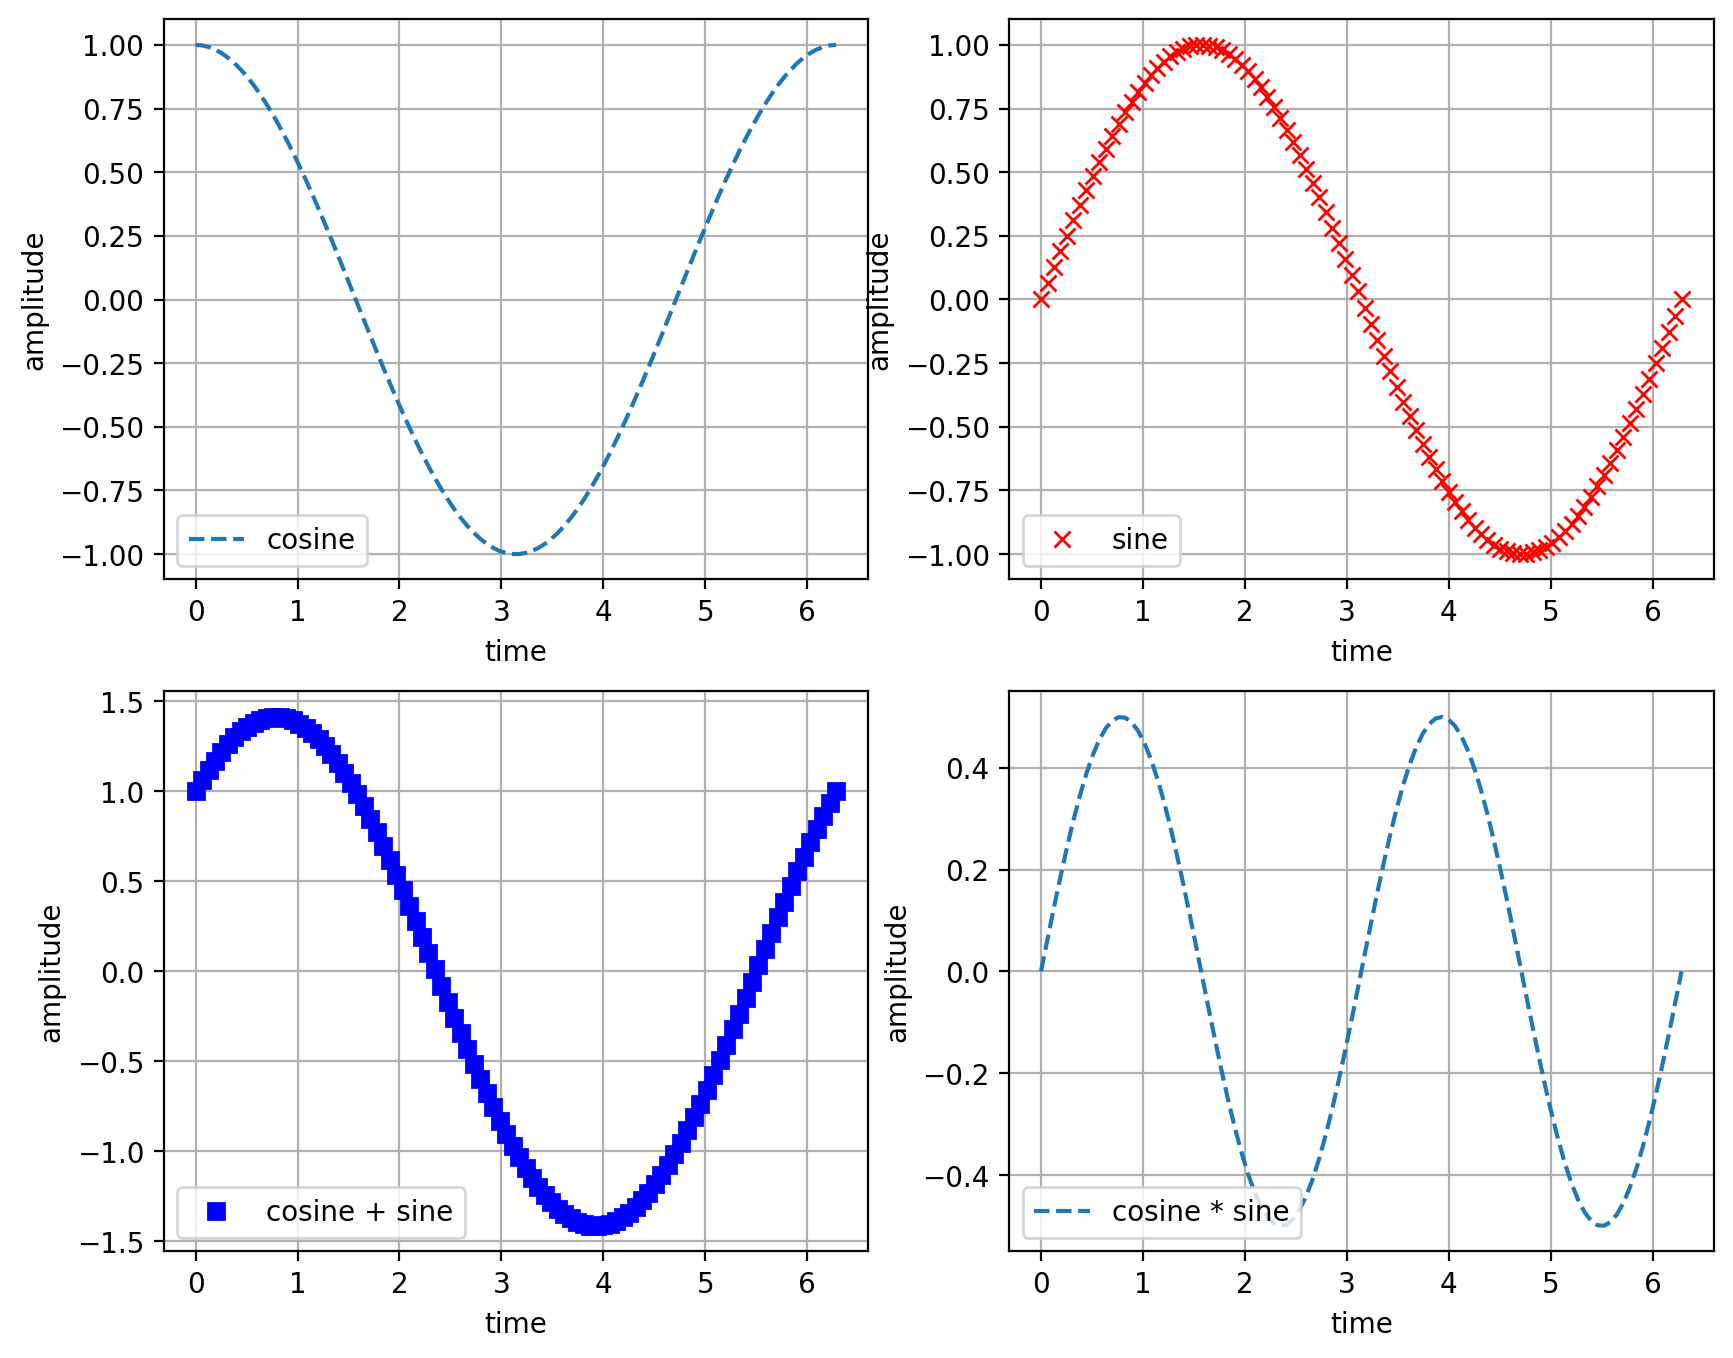

In [8]:
# if you have a lot of axes, it may be easier to specify them as an array rather than naming each one separately as we did above:

fig,axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(t,y1,'--',label='cosine')
axs[0,0].grid()
axs[0,0].legend(loc='lower left')
axs[0,0].set_ylabel('amplitude')
axs[0,0].set_xlabel('time')

axs[0,1].plot(t,y2,'rx',label='sine')
axs[0,1].grid()
axs[0,1].legend(loc='lower left')
axs[0,1].set_ylabel('amplitude')
axs[0,1].set_xlabel('time')

axs[1,0].plot(t,y1+y2,'bs',label='cosine + sine')
axs[1,0].grid()
axs[1,0].legend(loc='lower left')
axs[1,0].set_ylabel('amplitude')
axs[1,0].set_xlabel('time')

axs[1,1].plot(t,y1*y2,'--',label='cosine * sine')
axs[1,1].grid()
axs[1,1].legend(loc='lower left')
axs[1,1].set_ylabel('amplitude')
axs[1,1].set_xlabel('time')


plt.show()


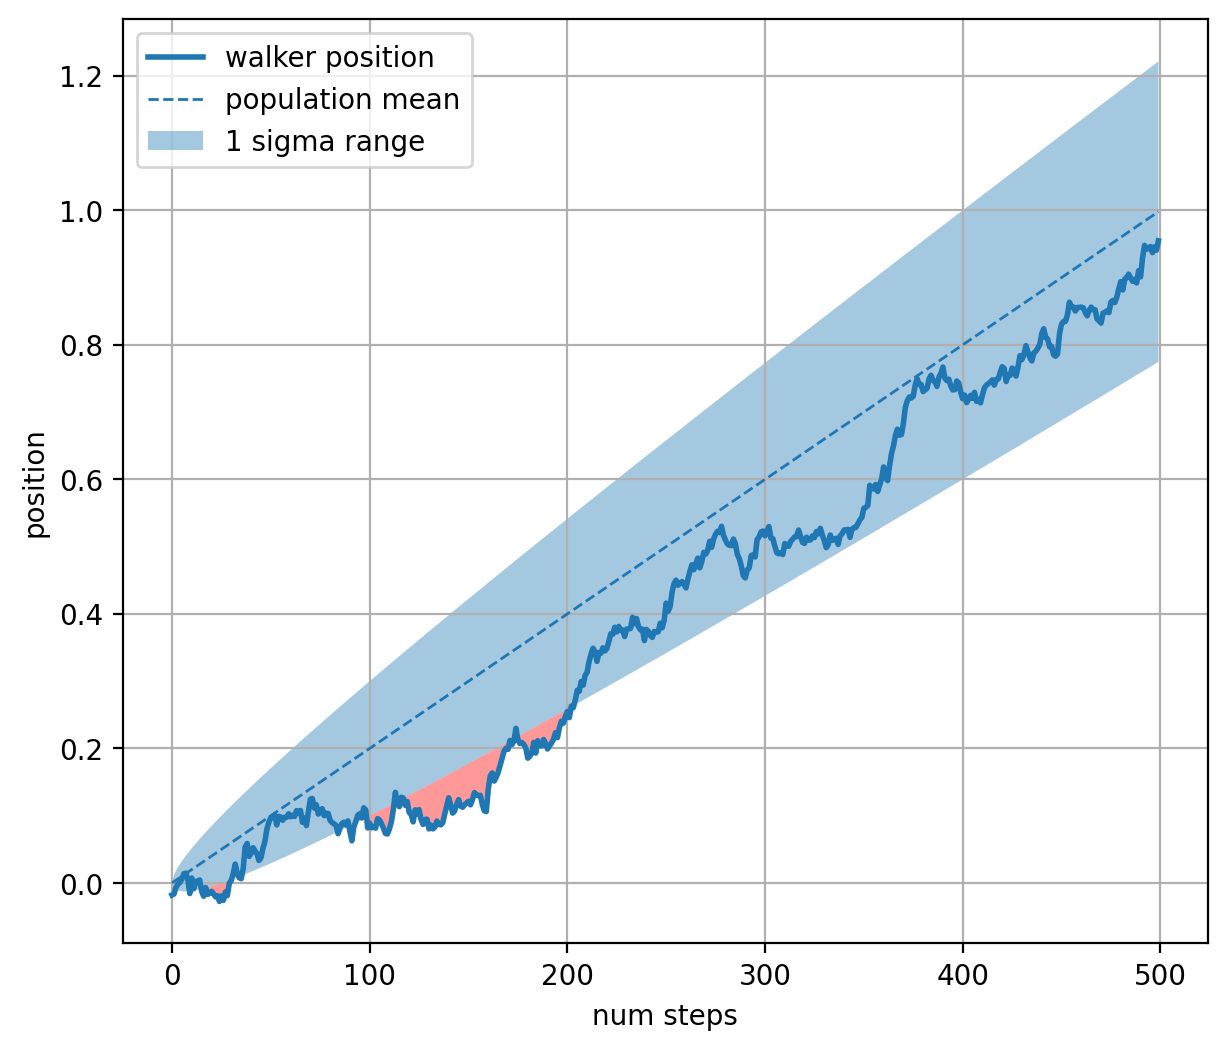

In [ ]:
# Here's a more complex example from the matplotlib examples gallery:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html
# This plots a random walk over time, and uses some special functions to make filled areas.

# run it a few times - each time is different!

Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

fig, ax = plt.subplots(1,figsize=(7,6))
ax.plot(t, X, lw=2, label='walker position')
ax.plot(t, mu*t, lw=1, label='population mean', color='C0', ls='--')
ax.fill_between(t, lower_bound, upper_bound, facecolor='C0', alpha=0.4,
                label='1 sigma range')
ax.legend(loc='upper left')

# here we use the where argument to only fill the region where the
# walker is above the population 1 sigma boundary
ax.fill_between(t, upper_bound, X, where=X > upper_bound, fc='red', alpha=0.4)
ax.fill_between(t, lower_bound, X, where=X < lower_bound, fc='red', alpha=0.4)
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

## 2. Interactive plots

Because we are using jupyter (which uses iPython), we have access to special interactive features that are not exactly built into python, but are very legal and very cool.

To create an interactive object, we must define a function that contains all the code we need to run inside it (e.g. creates our plot), with input arguments as the options we want to be adjustable, then pass the name of that function to the interactive() command.

This is pretty neat - we can put almost anything we like inside our function, including a complicated numerical model, or a function that does different operations on a dataset, and then simply drag the slider to see the effects. In fact, we don't even have to put a plot inside the function - we can just put some print statements, and they will also be updated dynamically.

In [ ]:
from ipywidgets import interactive

#define our plotting function, with inputs that we want to be variable.
# note that we give the inputs default values by specifying them here in the first line:
def my_special_plot(power=2,numpts=100,xmin=-10,xmax=10):
    # create the data:
    x=np.linspace(xmin,xmax,numpts)
    y=x**power

    # make a plot:
    plt.figure(figsize=(4,4))
    plt.axhline(y=0, color ='black')
    plt.axvline(x=0, color ='black')
    plt.plot(x,y,'-b.')
    plt.title('$y=x^%d$'%power) # use dollar signs to format strings as math equations, using LaTeX

# now, we create the interactive plot with interactive() and display().
w = interactive(my_special_plot, power=(0,10), numpts=(1,200), xmin=(-25.,0.),xmax=(1,25.))
display(w)


interactive(children=(IntSlider(value=2, description='power', max=10), IntSlider(value=100, description='numpt…

## 3. Raster data

The file 'sst.mon.ltm.1981-2010.nc' is a NetCDF file that contains monthly averages of global Sea Surface Temperature (SST) over the 30 years from 1981 to 2010, at 1x1 degree resolution. The dataset is a kind of "3D array" with dimensions 360 x 180 x 12. NetCDF files are very commonly used for this type of data storage in earth sciences, so it's good to be familiar with them.

Here is some example code that reads in the file, prints out the header information, and makes a simple plot of one slice of the data.

Note that the netCDF4 package may not be installed in your Jupyter-Lab. If you get an import error, you can add it by running in a separate cell the single command:
 `conda install netCDF4`. Or alternately, install it by running the same command on the command line (if you are using miniConda) or your Anaconda manager (if you are using full conda).


In [19]:
import netCDF4 as nc

#### install netCDF4:
Note, this is not really a python command, it's a shell command that Jupyter recognizes and automatically runs in a shell for us.

In [18]:
conda install netCDF4

Retrieving notices: done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/elindsey/miniconda3/envs/python3.12

  added / updated specs:
    - netcdf4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cftime-1.6.4               |  py312h80987f9_0         222 KB
    hdf4-4.2.13                |       h5e329fb_3         700 KB
    libnetcdf-4.8.1            |       h7d1a7d1_5         1.1 MB
    libzip-1.8.0               |       h62fee54_1         121 KB
    netcdf4-1.7.2              |  py312he029a62_1         1.1 MB
    ------------------------------------------------------------
                                           Total:       

In [21]:
# here is some code to get you started viewing and interacting with NetCDF files

# note, you may need to install this module first - search for it in your Anaconda manager or run the command 'conda install netcdf4'
import netCDF4 as nc

filename = 'sst.mon.ltm.1981-2010.nc'
dataset = nc.Dataset(filename)

# print some information about the dataset:
print(dataset)

# in the last line of the output, we can read that the array 'sst' is stored as a float32 array, with indices in the order (time,lat,lon).
# there is lots of other data in this file too!


<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: COBE Sea Surface Temperature Analysis
    history: Created 2021/05/10 by doMonthLTM
    platform: Analyses
    original_source: http://near-goos1.jodc.go.jp/cgi-bin/1997/near_goos_catalog?projectname=NEAR-GOOS
    Conventions: CF-1.2
    institution: NOAA ESRL/PSD
    comment: recent values (w/i last year) may change as dataset is updated. It is a monitoring dataset.
    dataset_title: COBE Sea Surface Temperature
    References: https://www.psl.noaa.gov/data/gridded/data.cobe.html
    not_missing_threshold_percent: minimum 3% values input to have non-missing output value
    dimensions(sizes): lon(360), lat(180), time(12), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float64 climatology_bounds(time, nbnds), float32 sst(time, lat, lon), int16 valid_yr_count(time, lat, lon)
    groups: 


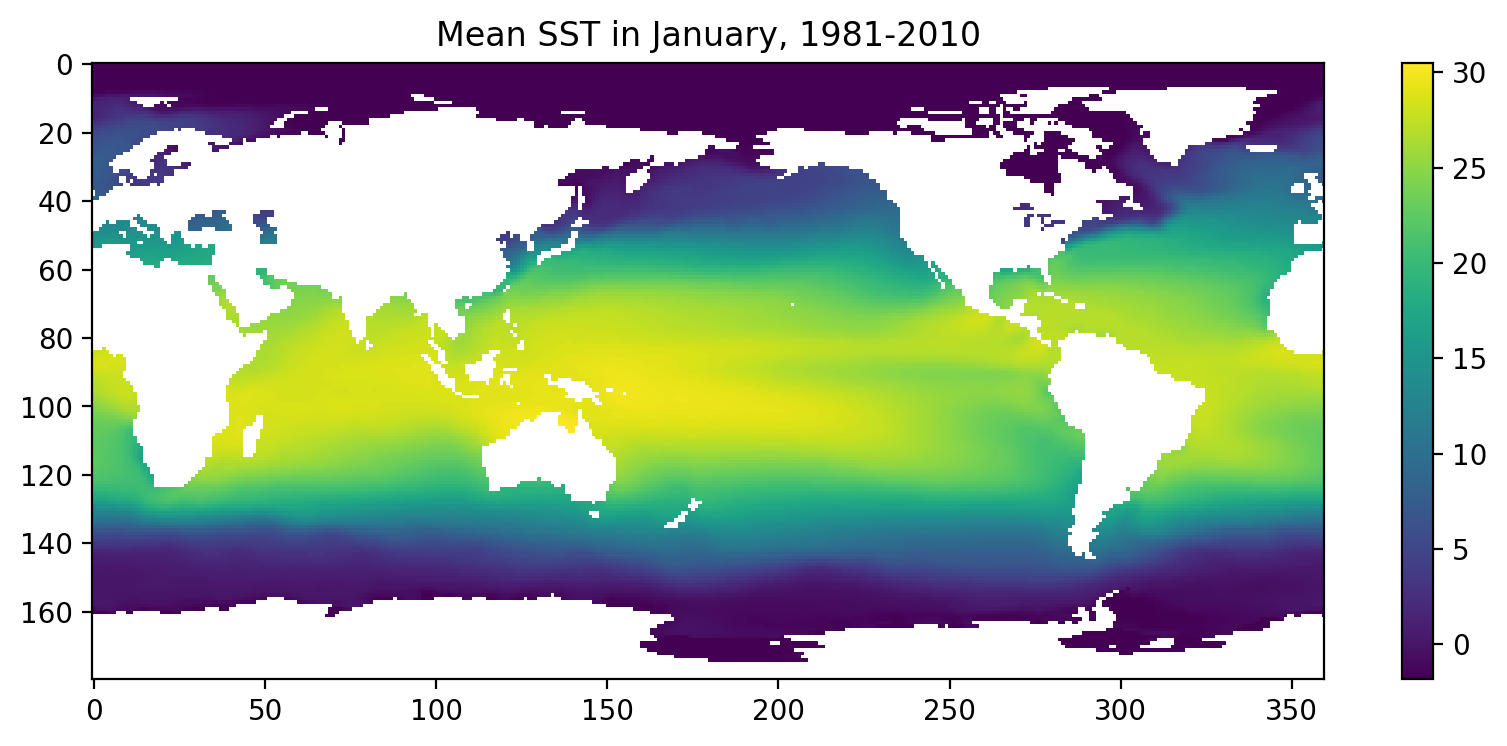

In [22]:
# get the grid in January
sst = dataset['sst'][0,:,:]

# now make a plot, using plt.imshow()
plt.figure(figsize=(10,4))
plt.imshow(sst)
plt.colorbar()
plt.title('Mean SST in January, 1981-2010')

# save the figure as a pdf
plt.savefig('my_figure.pdf')

plt.show()



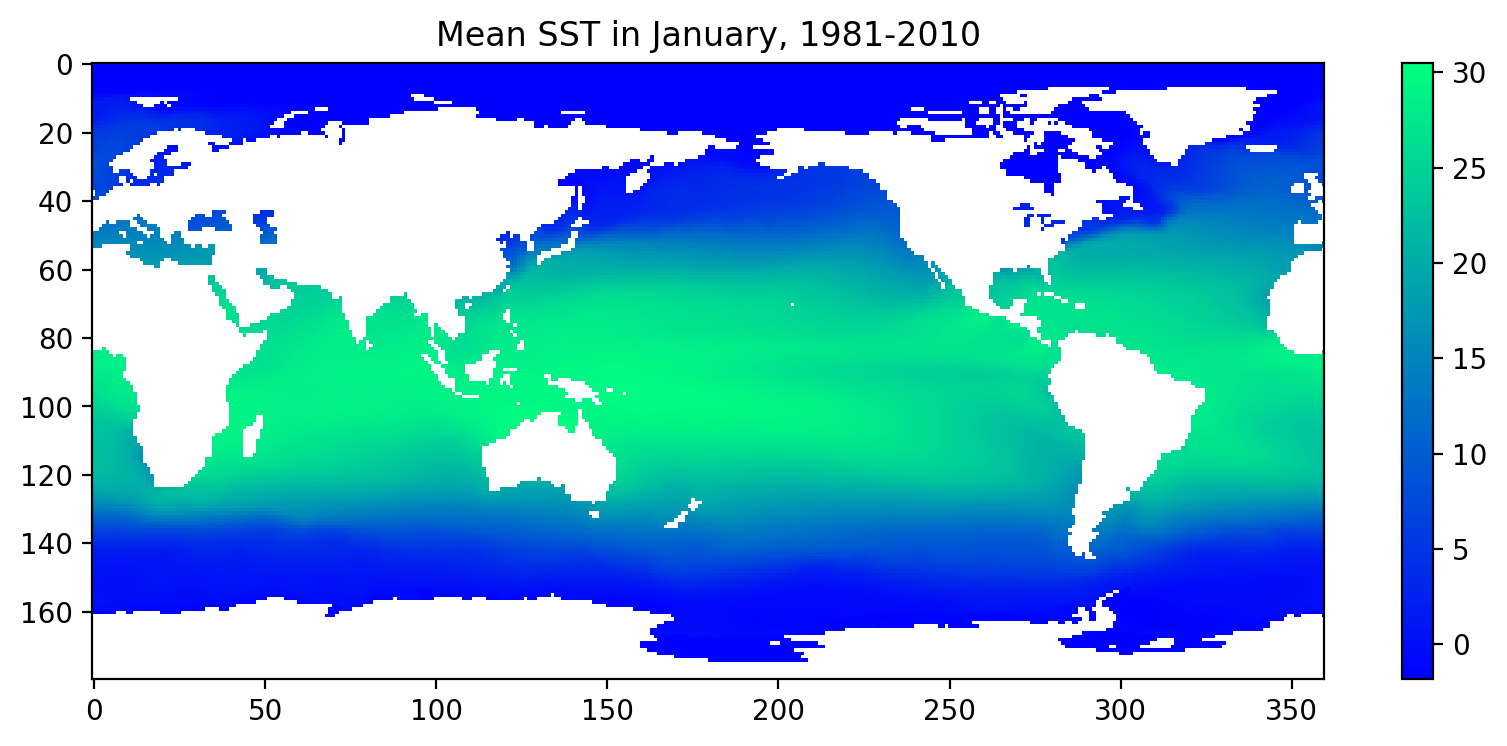

In [23]:
# How about a different colormap? Check out the list here: https://matplotlib.org/stable/gallery/color/colormap_reference.html
plt.figure(figsize=(10,4))
plt.imshow(sst, cmap=plt.cm.winter)
plt.colorbar()
plt.title('Mean SST in January, 1981-2010')
plt.show()